# Problem Statement:
 

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. 

Objective: To predict the total sales generated from all the sales channel.  

In [72]:
#Importing the necessary Libraries

# linear algebra
import numpy as np 

import warnings
warnings.simplefilter("ignore")

# data processing
import pandas as pd

# data visualization
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib import style

# Algorithms
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import pingouin as pg
import plotly.express as px
import scikitplot as skplt
from yellowbrick.model_selection import LearningCurve

import pickle
import joblib

# Loading the Dataset - "Advertising.csv"

In [73]:
data = pd.read_csv("Advertising.csv")

In [74]:
data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


# Data Exploration/Analysis

In [75]:
#Printing first 5 rows of dataset

data.head().style.background_gradient(cmap='plasma')

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.100000,37.800000,69.200000,22.100000
1,2,44.500000,39.300000,45.100000,10.400000
2,3,17.200000,45.900000,69.300000,9.300000
3,4,151.500000,41.300000,58.500000,18.500000
4,5,180.800000,10.800000,58.400000,12.900000


In [76]:
#Printing last 5 rows of dataset

data.tail().style.background_gradient(cmap='plasma')

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.200000,3.700000,13.800000,7.600000
196,197,94.200000,4.900000,8.100000,9.700000
197,198,177.000000,9.300000,6.400000,12.800000
198,199,283.600000,42.000000,66.200000,25.500000
199,200,232.100000,8.600000,8.700000,13.400000


Observations: In the above cell, we can see the first five and last five entries of our dataset and as per the problem statement the column "sales" is our target attribute for prediction making the other columns our feature attributes. Also,looking at the unnamed column one can say that it is useless in terms of contributing to any data and removing it will be better for our model.

Considering how we have continous data present in our target column,this makes it a Regression problem.

In [77]:
#dropping column "Unnamed"

data.drop('Unnamed: 0',axis=1,inplace=True)

In [78]:
data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [79]:
#checking the dataset dimension
data.shape

(200, 4)

In [80]:
# checking the column names

data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [81]:
#Checking datatype information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Remarks: We can see that the 3 feature column along with the target column are all of the same datatype i.e., float, making it easier for us to go through further data pre-processing steps.

In [82]:
#checking for null values

data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

Remarks: We see that there is no missing data so, we don't need to handle missing data.

# Statistical Analysis

In [83]:
data.describe().T.style.background_gradient(cmap='flag')

,count,mean,std,min,25%,50%,75%,max
TV,200.000000,147.042500,85.854236,0.700000,74.375000,149.750000,218.825000,296.400000
radio,200.000000,23.264000,14.846809,0.000000,9.975000,22.900000,36.525000,49.600000
newspaper,200.000000,30.554000,21.778621,0.300000,12.750000,25.750000,45.100000,114.000000
sales,200.000000,14.022500,5.217457,1.600000,10.375000,12.900000,17.400000,27.000000


Remarks:

count for all the columns are same, so, no data is missing.

Large difference between 75th percentile and max is present in newspaper. while the other two feature columns show reasonable increase between each of their quantiles.

In [84]:
# Statistics testing

pg.linear_regression(data[['radio', 'newspaper','TV']], data['sales'])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,2.938889,0.311908,9.422288,1.267295e-17,0.897211,0.895637,2.323762,3.554016
1,radio,0.188530,0.008611,21.893496,1.505339e-54,0.897211,0.895637,0.171547,0.205513
2,newspaper,-0.001037,0.005871,-0.176715,8.599151e-01,0.897211,0.895637,-0.012616,0.010541
3,TV,0.045765,0.001395,32.808624,1.509960e-81,0.897211,0.895637,0.043014,0.048516


Remarks: From the above obervation ,we can say newspaper is not statistically significant so we will drop it. We can say that for advertising, newspaper is not increasing sales that much as compared to TV and radio.

# Exploratory Data Analysis (EDA):

# Univariate Analysis

<AxesSubplot:xlabel='sales', ylabel='Density'>

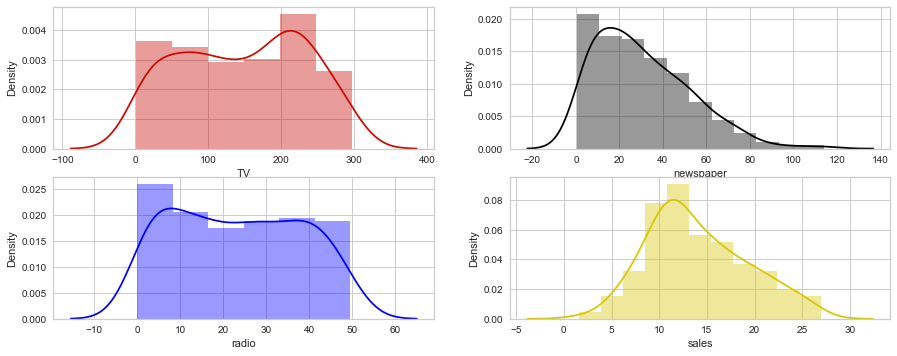

In [85]:
#Distribution plot

plt.figure(figsize=(15,12))
plt.subplot(4,2,1)
sns.distplot(data.TV,kde=True,color='r')
plt.subplot(4,2,2)
sns.distplot(data.newspaper,kde=True,color='black')
plt.subplot(4,2,3)
sns.distplot(data.radio,kde=True,color='blue')
plt.subplot(4,2,4)
sns.distplot(data.sales,kde=True,color='y')

Observation:
    
We can say sales is normally distributed

Newspaper is right skewed

TV and radio have is not normally distribution, so we have to normalize them.

# Bivariate Analysis

Text(0.5, 1.0, 'Sales VS RADIO')

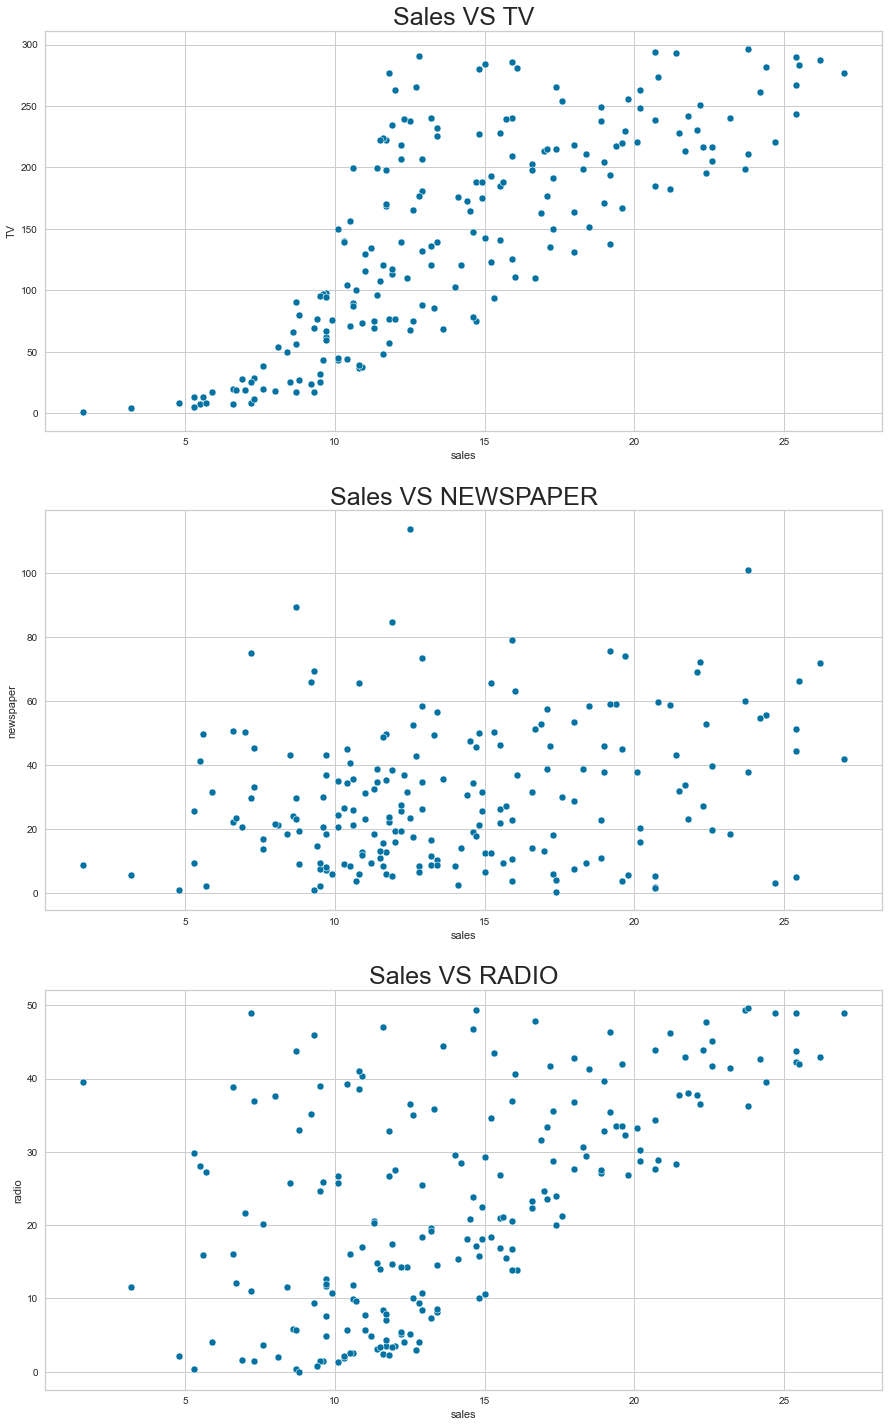

In [86]:
#Scatterplot

plt.figure(figsize=(15,25))
plt.subplot(3,1,1)
sns.scatterplot(x='sales',y='TV',data=data)
plt.title("Sales VS TV",fontsize=25)
plt.subplot(3,1,2)
sns.scatterplot(x='sales',y='newspaper',data=data)
plt.title("Sales VS NEWSPAPER",fontsize=25)
plt.subplot(3,1,3)
sns.scatterplot(x='sales',y='radio',data=data)
plt.title("Sales VS RADIO",fontsize=25)

Observation:

Radio and TV shows linear relationship with sales as compared to newspaper which shows no such linear relationship as we already checked it with statistics testing but it is good to check it with visualization too.

Text(0.5, 1.0, 'SALES QQPLOT')

<Figure size 1080x1800 with 0 Axes>

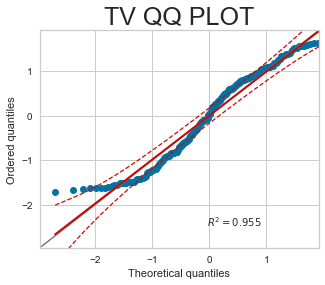

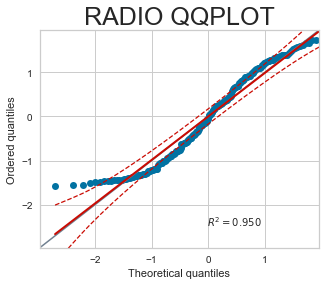

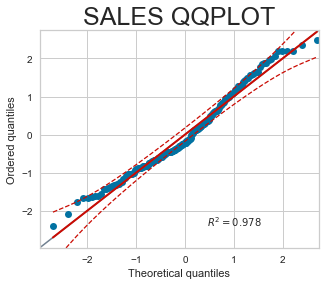

In [87]:
#QQplot

plt.figure(figsize=(15,25))
pg.qqplot(data['TV'])
plt.title("TV QQ PLOT",fontsize=25)
pg.qqplot(data['radio'])
plt.title("RADIO QQPLOT",fontsize=25)
pg.qqplot(data['sales'])
plt.title("SALES QQPLOT",fontsize=25)

Observation: From qq plot, we can say Radio and TV have high middle peak and sales is a little right skewed.

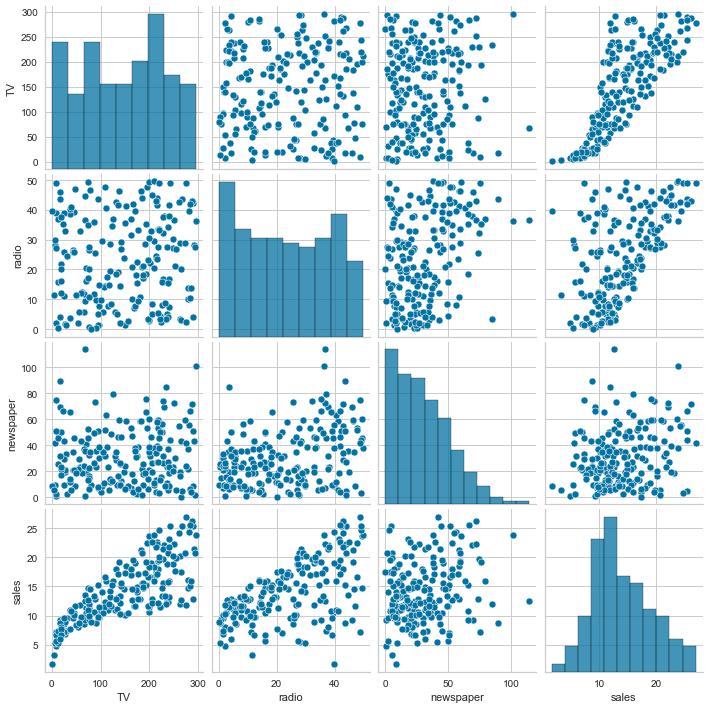

In [88]:
#Pairplot

sns.pairplot(data)

Observation: From the above pairplot, we can see that TV and Radio columns have a linear relationship with Sales. However the Newspaper column is too scattered and we can see an increase with respect to sales but their is no definite linear pattern.

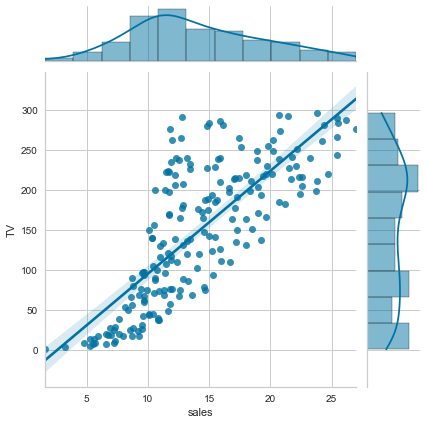

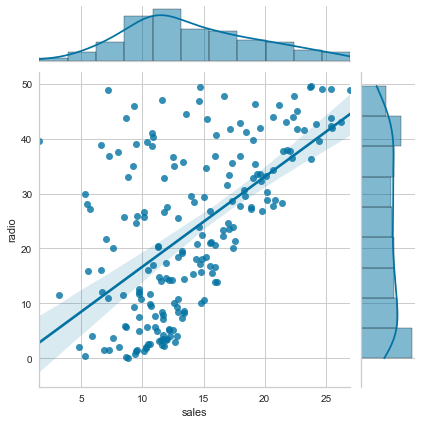

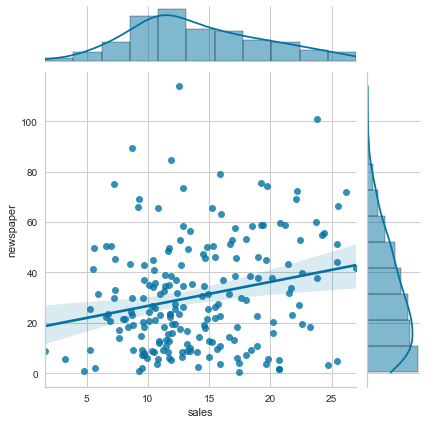

In [89]:
#Jointplot

sns.jointplot(x='sales',y='TV',data=data,kind='reg')
sns.jointplot(x='sales',y='radio',data=data,kind='reg')
sns.jointplot(x='sales',y='newspaper',data=data,kind='reg')

Observation: With the help of jointplot, we can see the distribution as well as the direction of sales whether it is positive or not. TV AND Radio is having a positive direction and as the value of TV and radio increasing, sales is also increasing.

In [90]:
#plotting area charts
px.area(data,y='TV',x='sales')

Remarks: As TV values are increasing, the sales is also increasing which means more advertising on tv leading to increase in the sales.

In [91]:
px.area(data,y='newspaper',x='sales')

Remarks: Newspaper is not having that much effect on sales.

In [92]:
px.area(data,y='radio',x='sales')

Remarks: With advertising on radio, sales is increasing.

# Multivariate Analysis

# Checking correlation:

In [22]:
#dropping newspaper column

data.drop('newspaper',axis=1,inplace=True)

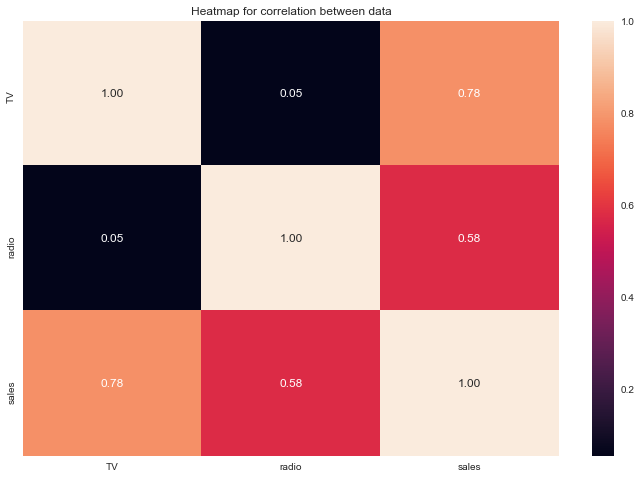

In [23]:
data_corr=data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(data_corr,annot=True,fmt=".2f")
plt.title('Heatmap for correlation between data')
plt.show()

Observation: In the above heatmap ,we can see that there are no negative correlation present in between our features and label, or between the feature columns either. Moreover the sales a high positive correlation with TV.

# Checking Outliers

<AxesSubplot:xlabel='variable', ylabel='value'>

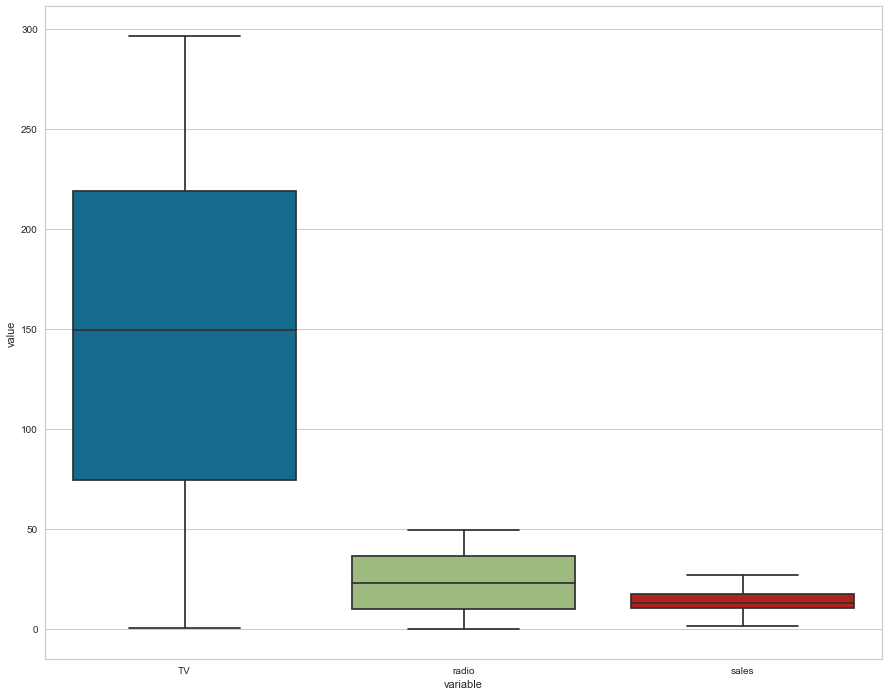

In [24]:
#outliers check with Boxplot
plt.figure(figsize=(15,12))
sns.boxplot(x='variable',y='value',data=pd.melt(data))

Observation: There is no outliers present in any of the columns so we can proceed for ML model building.

# Checking skewness

In [25]:
data.skew()

TV      -0.069853
radio    0.094175
sales    0.407571
dtype: float64

Remarks: skewness is not there, so we don't need to apply log transform.

# Preparing Data for Model:

In [26]:
X=data.drop('sales',axis=1)
y=data['sales']

In [27]:
x=X

# Feature Engineering

In [28]:
#Scaling data using MinMaxScaler
scaler=MinMaxScaler()
X_new=scaler.fit_transform(X)
x_new=pd.DataFrame(X_new,columns=x.columns)
x_new

,TV,radio
0,0.775786,0.762097
1,0.148123,0.792339
2,0.055800,0.925403
3,0.509976,0.832661
4,0.609063,0.217742
...,...,...
195,0.126818,0.074597
196,0.316199,0.098790
197,0.596212,0.187500
198,0.956713,0.846774


Remarks: Using MinMaxScaler because we do not have data that is normally distributed so weare using MinMaxScaler to convert data into normal distribution. We use standard scaler when our data is normally distributed.

# Creating the training and testing datasets

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.3,random_state=42)

# Finding the best model:

In [30]:
models={
    "LinearRegression":LinearRegression(),
    "DecisionTree":DecisionTreeRegressor(),
    "KNN":KNeighborsRegressor(),
    "RandomForest":RandomForestRegressor(),
    "ExtraTrees":ExtraTreesRegressor()
}

**************************************** LinearRegression **********************************************


Cross_Val_Score 0.889282957306453


Score 0.8656253548947075


MEAN_SQUARE_ERROR 1.3896065408465317e+20


MEAN_ABSOLUTE_ERROR 2536838119.679398


RMSE 11788157365.960686


MODEL PERFORMANCE CURVE


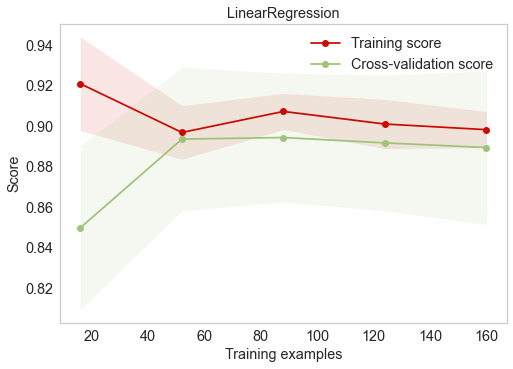

**************************************** DecisionTree **********************************************


Cross_Val_Score 0.9632550113359054


Score 0.9504296130720302


MEAN_SQUARE_ERROR 3.581301769870581e+19


MEAN_ABSOLUTE_ERROR 1785997031.5034566


RMSE 5984397855.983993


MODEL PERFORMANCE CURVE


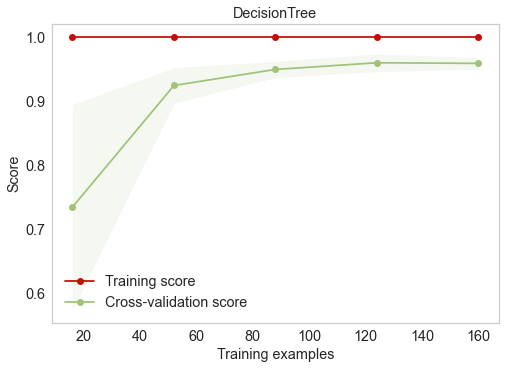

**************************************** KNN **********************************************


Cross_Val_Score 0.9664569127526399


Score 0.9631102564188646


MEAN_SQUARE_ERROR 4.263711875050473e+19


MEAN_ABSOLUTE_ERROR 1460021389.0926042


RMSE 6529710464.5232725


MODEL PERFORMANCE CURVE


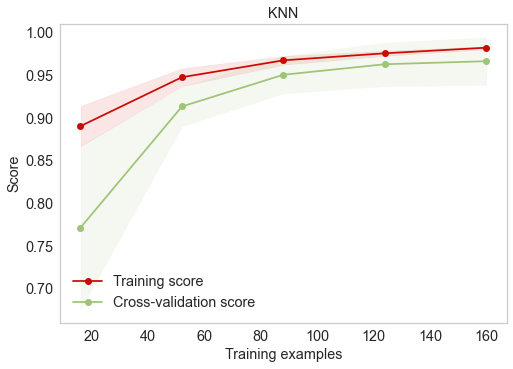

**************************************** RandomForest **********************************************


Cross_Val_Score 0.9779358272445193


Score 0.9844750699897118


MEAN_SQUARE_ERROR 2.8307760329293177e+19


MEAN_ABSOLUTE_ERROR 1152407405.6271703


RMSE 5320503766.495535


MODEL PERFORMANCE CURVE


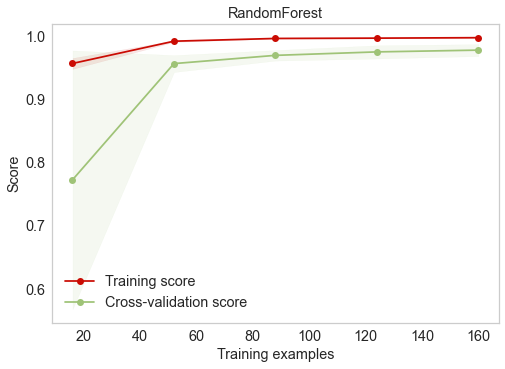

**************************************** ExtraTrees **********************************************


Cross_Val_Score 0.9873150558385928


Score 0.9866715514749801


MEAN_SQUARE_ERROR 6.668939199689266e+19


MEAN_ABSOLUTE_ERROR 1732127735.3417482


RMSE 8166357327.284464


MODEL PERFORMANCE CURVE


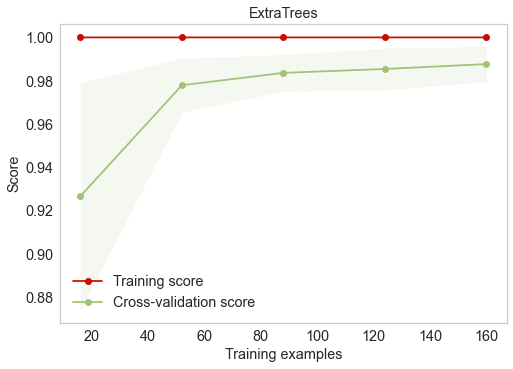

In [31]:
cvs=[]
Model=[]
score=[]
R2_score=[]
Mse=[]
Mae=[]
rmse=[]
for name,model in models.items():
  print("****************************************",name,"**********************************************")
  Model.append(name)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print("\n")
  cs=cross_val_score(model,X_new,y,cv=5,scoring='r2').mean()
  print("Cross_Val_Score",cs)
  cvs.append(cs*100)
  mse=mean_squared_error(np.exp(y_test),np.exp(y_pred))
  Mse.append(mse)
  print("\n")
  sc=model.score(X_test,y_test)
  score.append(sc)
  print("Score",sc)
  print("\n")
  print("MEAN_SQUARE_ERROR",mse)
  print("\n")
  mae=mean_absolute_error(np.exp(y_test),np.exp(y_pred))
  Mae.append(mae)
  print("MEAN_ABSOLUTE_ERROR",mae)
  print("\n")
  rmse=np.sqrt(mse)
  print("RMSE",rmse)
  print("\n")
  print("MODEL PERFORMANCE CURVE")
  skplt.estimators.plot_learning_curve(model,X_new,y,cv=5,scoring='r2',text_fontsize='large',title=name)
  plt.show()

# Observation: We are getting good accuracy with ExtraTreesRegressor so we will do hyperparameter tuning of that model.

# Hyper parameter tuning on the best ML Model:

In [32]:
Trees=ExtraTreesRegressor()

In [33]:
param={
    "bootstrap":[True,False],
    "max_depth":[1,2,3,4,None],
    "min_samples_leaf":[1,2,3,4,None],
    "min_samples_split":[1,2,3,4,None],
    "max_leaf_nodes":[1,2,3,4,None],
    "n_estimators":[100,200,300,400,500]
}

In [34]:
grid=GridSearchCV(estimator=Trees,cv=5,n_jobs=-1,param_grid=param)

In [35]:
grid.fit(X_new,y)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [1, 2, 3, 4, None],
                         'max_leaf_nodes': [1, 2, 3, 4, None],
                         'min_samples_leaf': [1, 2, 3, 4, None],
                         'min_samples_split': [1, 2, 3, 4, None],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [36]:
grid.best_score_

0.9883148494285621

In [37]:
#Checking the model performance with best params
grid.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 400}

Remarks: Accuracy increased from 98.73 to 98.83

# Final model performance metrics:

In [39]:
ETree=ExtraTreesRegressor(bootstrap= False,
                          max_depth= None,
                          max_leaf_nodes= None,
                          min_samples_leaf= 1,
                          min_samples_split= 3,
                          n_estimators= 500)

In [40]:
ETree.fit(X_train,y_train)
y_pred=ETree.predict(X_test)
print("MEAN_SQUARE_ERROR",mean_squared_error(y_test,y_pred))
print("ROOT_MEAN_SQUARE_ERROR",np.sqrt(mean_squared_error(y_test,y_pred)))
print("MEAN_ABSOLUTE_ERROR",mean_absolute_error(y_test,y_pred))
print("R2_SCORE",r2_score(y_test,y_pred))

MEAN_SQUARE_ERROR 0.3500494121666716
ROOT_MEAN_SQUARE_ERROR 0.5916497377390373
MEAN_ABSOLUTE_ERROR 0.431568333333338
R2_SCORE 0.9871798412966307


# Saving the Model or Serialization:

In [67]:
joblib.dump(grid,"Advertising.obj")

['Advertising.obj']

# Loading the model:

In [68]:
model=joblib.load('Advertising.obj')

In [69]:
y_pred=model.predict(X_test)

In [70]:
r2_score(y_test,y_pred)

0.9994428874452818

In [71]:
pred_data=pd.DataFrame()
pred_data['Real_Values']=y_test
pred_data['predicted_by_model']=y_pred
pred_data

,Real_Values,predicted_by_model
95,16.9,16.912875
15,22.4,22.420500
30,21.4,21.099250
158,7.3,7.287000
128,24.7,24.736875
115,12.6,12.673375
69,22.3,22.363250
170,8.4,8.433500
174,11.5,11.591375
45,14.9,14.922625


# Conclusion

From the given dataset, we build a model that can predict sales according to advertising from different platform.

Using statistical test, we found that newspaper is not statistically significant so we dropped it.

Finally we built a model that can predict the sales with 98.83% accuracy.

Table above shows the original target value and predicted target value. 